In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
np.set_printoptions(suppress=True)
zero_one_colourmap = ListedColormap(('white', 'red'))
rcParams['figure.figsize'] = 14, 7
rcParams['axes.facecolor'] = '#383838'

In [3]:
X, y = make_circles(n_samples = 1000, 
                    factor=0.85, 
                    random_state=2021, 
                    noise=0.1)

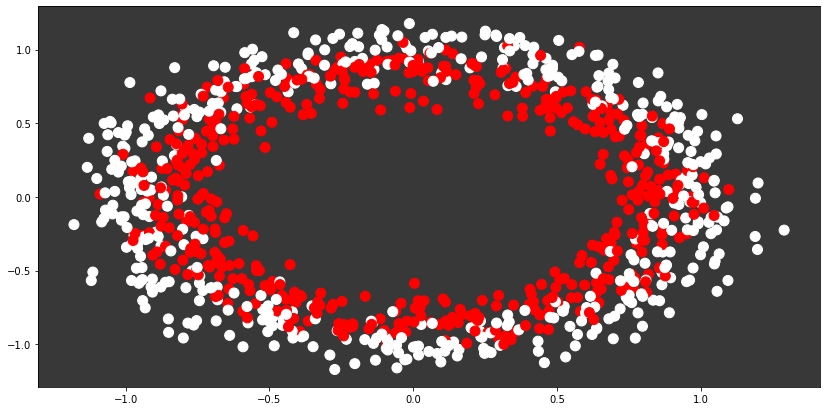

In [53]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [5]:
def get_model(inp_activation):
  model = Sequential()
  model.add(Dense(10,input_dim=2, activation=inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid")) # final is Sigmoid as its a binary claffificaiton problem
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

\begin{equation}w_{n e w}=w_{o l d}-\alpha * \frac{\delta Loss}{\delta w}\end{equation}


\begin{equation} \frac{\delta Loss}{\delta w} = \frac{w_{old} - w_{new}}{\alpha } \end{equation}

In [6]:
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
  gradient = (old_weight - new_weight)/ learning_rate
  pct_change_weight = abs(100*(old_weight - new_weight)/ old_weight) # % change in weights
  return gradient, pct_change_weight

# Sigmoid Model

In [7]:
sigmoid_model = get_model("sigmoid")

In [8]:
sigmoid_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

In [9]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][0]

In [10]:
sigmoid_model_first_layer_weights

array([-0.21723548, -0.3587088 , -0.44507325,  0.19532585, -0.49745923,
       -0.3903314 , -0.24551854,  0.14680016,  0.17197669, -0.05191565],
      dtype=float32)

In [11]:
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs = 1, 
                            validation_data = (X_test, y_test))

21/21 [==============================] - 0s 18ms/step - loss: 0.6942 - accuracy: 0.5119 - val_loss: 0.6981 - val_accuracy: 0.4758


In [12]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]

In [13]:
sigmoid_model_first_layer_weights_updated

array([-0.21723682, -0.35870525, -0.44507644,  0.19532928, -0.4974577 ,
       -0.39033008, -0.24552406,  0.14679833,  0.17197508, -0.0519222 ],
      dtype=float32)

In [14]:
s_gradient, s_weight_change = change_in_weight_gradient(sigmoid_model_first_layer_weights,
                                                        sigmoid_model_first_layer_weights_updated, 
                                                        sigmoid_model.optimizer.get_config()["learning_rate"])

In [15]:
s_gradient

array([ 0.0013411 , -0.00354648,  0.00318885, -0.00342727, -0.00151992,
       -0.0013113 ,  0.00552833,  0.00183284,  0.00160933,  0.00655651],
      dtype=float32)

In [16]:
s_weight_change

array([0.00061735, 0.00098868, 0.00071648, 0.00175464, 0.00030554,
       0.00033595, 0.0022517 , 0.00124853, 0.00093578, 0.01262916],
      dtype=float32)

# Relu Model

In [17]:
activation_model = get_model("relu")

In [18]:
activation_model_old_first_layer_weight = activation_model.get_weights()[0][0]
activation_model_old_first_layer_weight

array([ 0.3513543 ,  0.32454306, -0.639882  , -0.3420655 ,  0.18165374,
        0.27741086, -0.46127683,  0.5056811 ,  0.69306093,  0.20897418],
      dtype=float32)

In [19]:
activation_history = activation_model.fit(X_train, y_train, epochs = 1, 
                                          validation_data = (X_test, y_test))

21/21 [==============================] - 0s 21ms/step - loss: 0.6933 - accuracy: 0.4627 - val_loss: 0.6933 - val_accuracy: 0.4455


In [20]:
activation_model_updated_first_layer_weight = activation_model.get_weights()[0][0]

In [21]:
activation_model_updated_first_layer_weight

array([ 0.3517106 ,  0.31821358, -0.6447567 , -0.3395511 ,  0.18021695,
        0.27232727, -0.46034062,  0.50135237,  0.69173205,  0.20596232],
      dtype=float32)

In [22]:
relu_gradient, relu_weight_change = change_in_weight_gradient(activation_model_old_first_layer_weight, 
                                                              activation_model_updated_first_layer_weight, 
                                                              activation_model.optimizer.get_config()["learning_rate"])

In [23]:
relu_gradient

array([-0.35628673,  6.3294764 ,  4.8746467 , -2.5144217 ,  1.4367847 ,
        5.0835905 , -0.9362101 ,  4.3287277 ,  1.3288854 ,  3.0118673 ],
      dtype=float32)

In [24]:
relu_weight_change

array([0.10140384, 1.9502734 , 0.761804  , 0.7350703 , 0.790947  ,
       1.8325132 , 0.20296058, 0.85601926, 0.19174151, 1.441263  ],
      dtype=float32)

### Conclusion:

We can see hou Gradient Descent Vanishes in Sigmoid AF, but is being solved in ReLU